In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import models

import pandas as pd
import numpy as np
import os
import encoders
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, LSTM
from keras.models import Model
from keras.optimizers import Adam

# https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
def model9(vocabulary_size, input_length):
    input_layer = Input(shape=(input_length,))
    x = Embedding(input_dim=vocabulary_size, input_length=input_length, output_dim=64)(input_layer)
    x = LSTM(64, return_sequences=True)(x)
    x = LSTM(64)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(input_layer, x)
    optimizer = Adam(lr=0.0003)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return 'model9-weights.hdf5', model

In [13]:
filepath, model = model9(len(char_to_int) + 1, max_tweet_len)
# if filepath in os.listdir():
#     model.load_weights(filepath)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 166, 64)           33664     
_________________________________________________________________
lstm_3 (LSTM)                (None, 166, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 99,842
Trainable params: 99,842
Non-trainable params: 0
_________________________________________________________________


In [14]:
#models.train(X_train, y_train, model, filepath)

In [15]:
predictions = np.argmax(model.predict(X_test), axis=1)

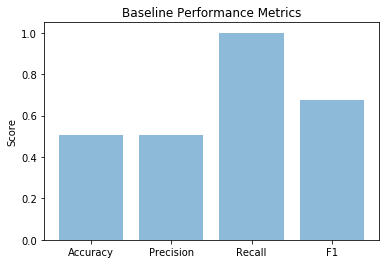

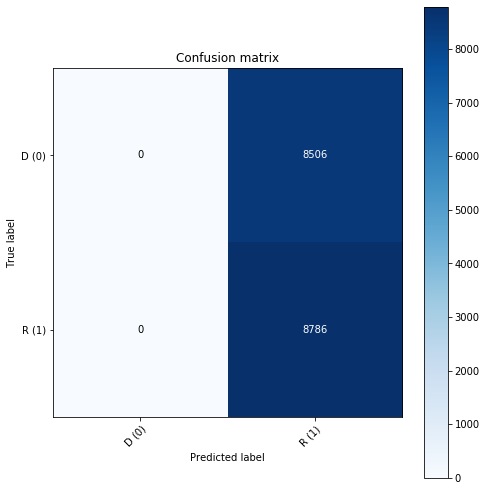

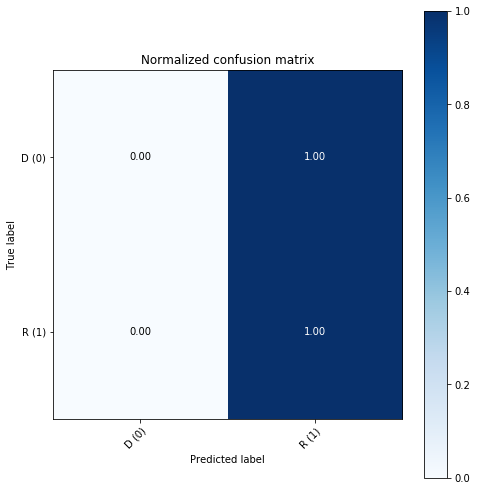

Accuracy: 0.5080962294702752
Precision: 0.5080962294702752
Recall: 1.0
F1: 0.6738246798067336


In [16]:
metrics, confusion_matrix = models.plot_results(y_test, predictions)
(accuracy, precision, recall, f1) = metrics
print('Accuracy: %s' % accuracy)
print('Precision: %s' % precision)
print('Recall: %s' % recall)
print('F1: %s' % f1)

In [17]:
metrics

[0.5080962294702752, 0.5080962294702752, 1.0, 0.6738246798067336]